In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time

In [2]:
file = "dataset.csv"
dataset = pd.read_csv(file)
print(dataset.head())

   id  age  year  sex  glang  part  job  stud_h  health  psyt  jspe  qcae_cog  \
0   2   18     1    1    120     1    0      56       3     0    88        62   
1   4   26     4    1      1     1    0      20       4     0   109        55   
2   9   21     3    2      1     0    0      36       3     0   106        64   
3  10   21     2    2      1     0    1      51       5     0   101        52   
4  13   21     3    1      1     1    0      22       4     0   102        58   

   qcae_aff  amsp  erec_mean  cesd  stai_t  mbi_ex  mbi_cy  mbi_ea  
0        27    17   0.738095    34      61      17      13      20  
1        37    22   0.690476     7      33      14      11      26  
2        39    17   0.690476    25      73      24       7      23  
3        33    18   0.833333    17      48      16      10      21  
4        28    21   0.690476    14      46      22      14      23  


In [3]:
df = dataset.drop(['id', 'amsp'], axis=1)

In [4]:
df_cat = df[['sex', 'year', 'glang', 'part', 'job', 'stud_h', 'health', 'psyt']]
df_num = df[['age', 'jspe', 'qcae_cog', 'qcae_aff', 'erec_mean', 'cesd', 'stai_t', 'mbi_ex', 'mbi_cy', 'mbi_ea']]
# df_cat = df[['sex', 'year', 'glang', 'part', 'job', 'stud_h', 'health', 'psyt']]
# df_num = df[['age', 'jspe', 'qcae_cog', 'qcae_aff', 'erec_mean']]

vars_categoriques = ['sex', 'year', 'glang', 'part', 'job', 'stud_h', 'health', 'psyt']
vars_num = ['age', 'jspe', 'qcae_cog', 'qcae_aff', 'erec_mean', 'cesd', 'stai_t', 'mbi_ex', 'mbi_cy', 'mbi_ea']
vars_bin = ['part', 'job', 'psyt']

# Detecció de Biaix

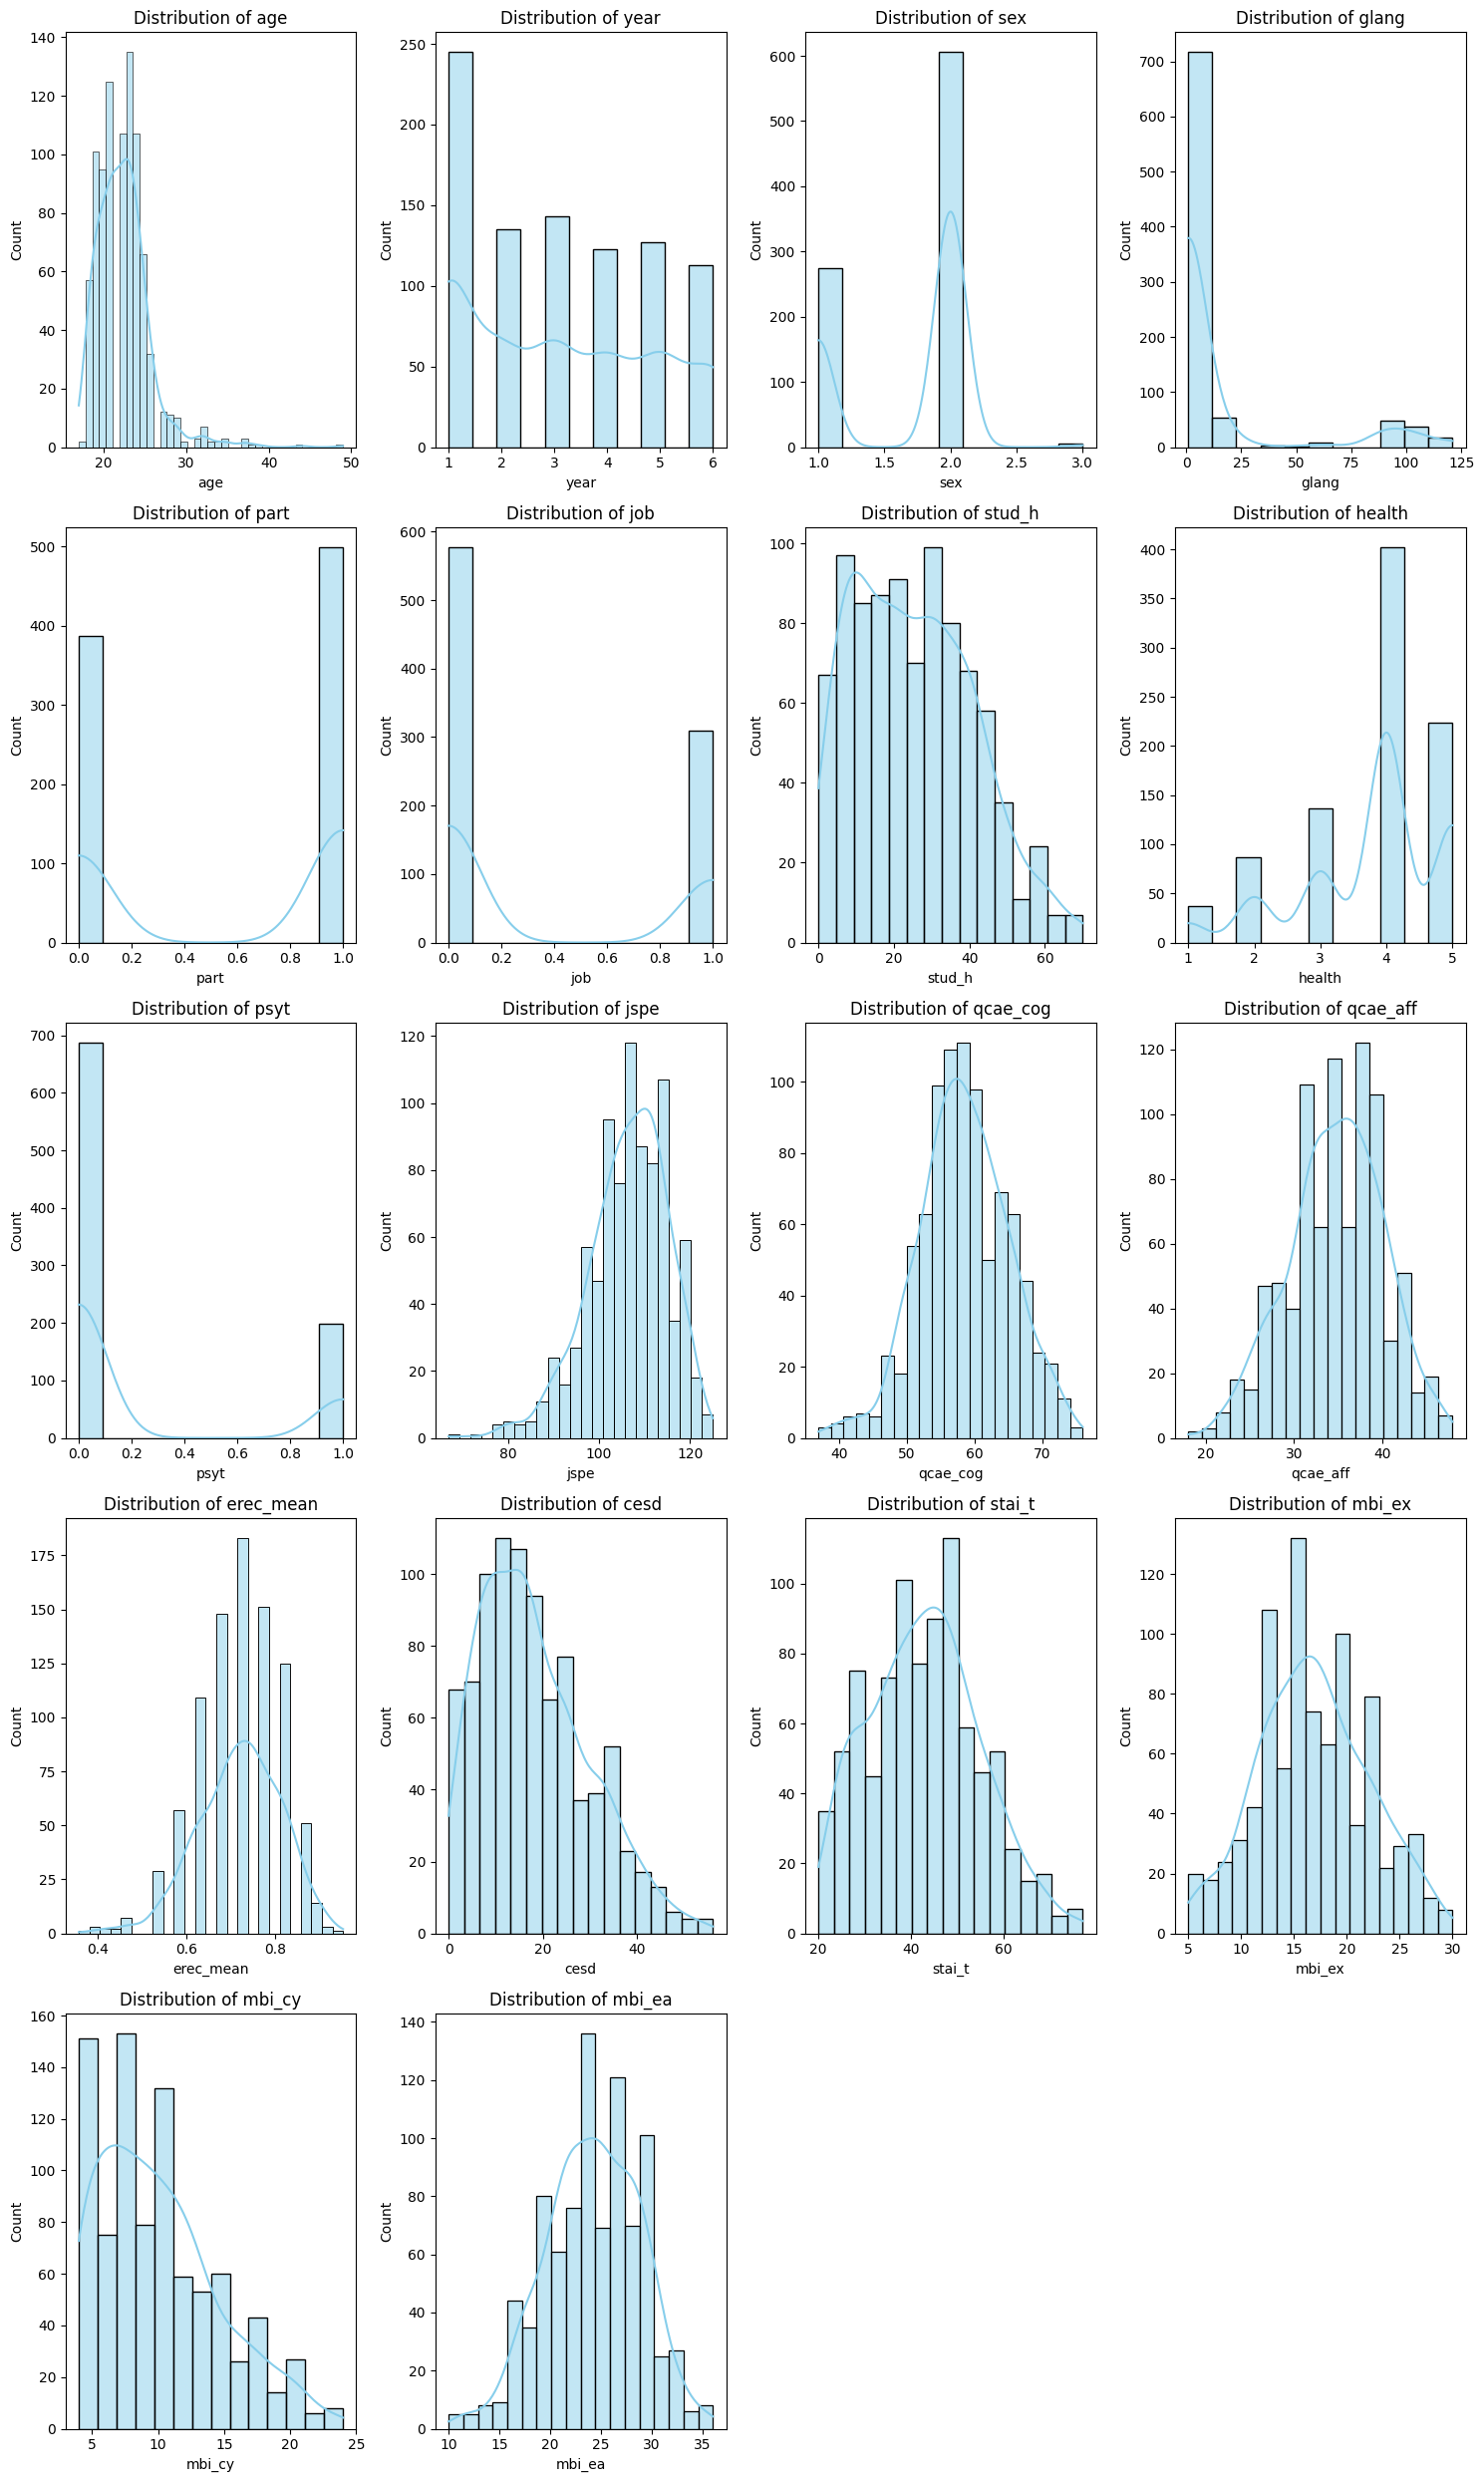

In [5]:
# Determine grid size
def df_dis(df):
    num_cols = len(df.columns)
    num_rows = math.ceil(num_cols / 4)  # Adjust columns per row as needed

    fig, axes = plt.subplots(num_rows, 4, figsize=(15, num_rows * 5))  # 3 columns per row
    axes = axes.flatten()

    # Loop through each column and plot on a specific subplot
    for i, column in enumerate(df.columns):
        ax = axes[i]
        if df[column].dtype == 'object':
            sns.countplot(x=column, data=df, ax=ax, palette="Set2")
            ax.set_title(f'Distribution of {column}')
            ax.tick_params(axis='x', rotation=45)
        else:
            sns.histplot(df[column], kde=True, ax=ax, color="skyblue")
            ax.set_title(f'Distribution of {column}')
            
    # Hide any unused subplots
    for i in range(num_cols, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

df_dis(df)

# Normalització

## Normalització Max

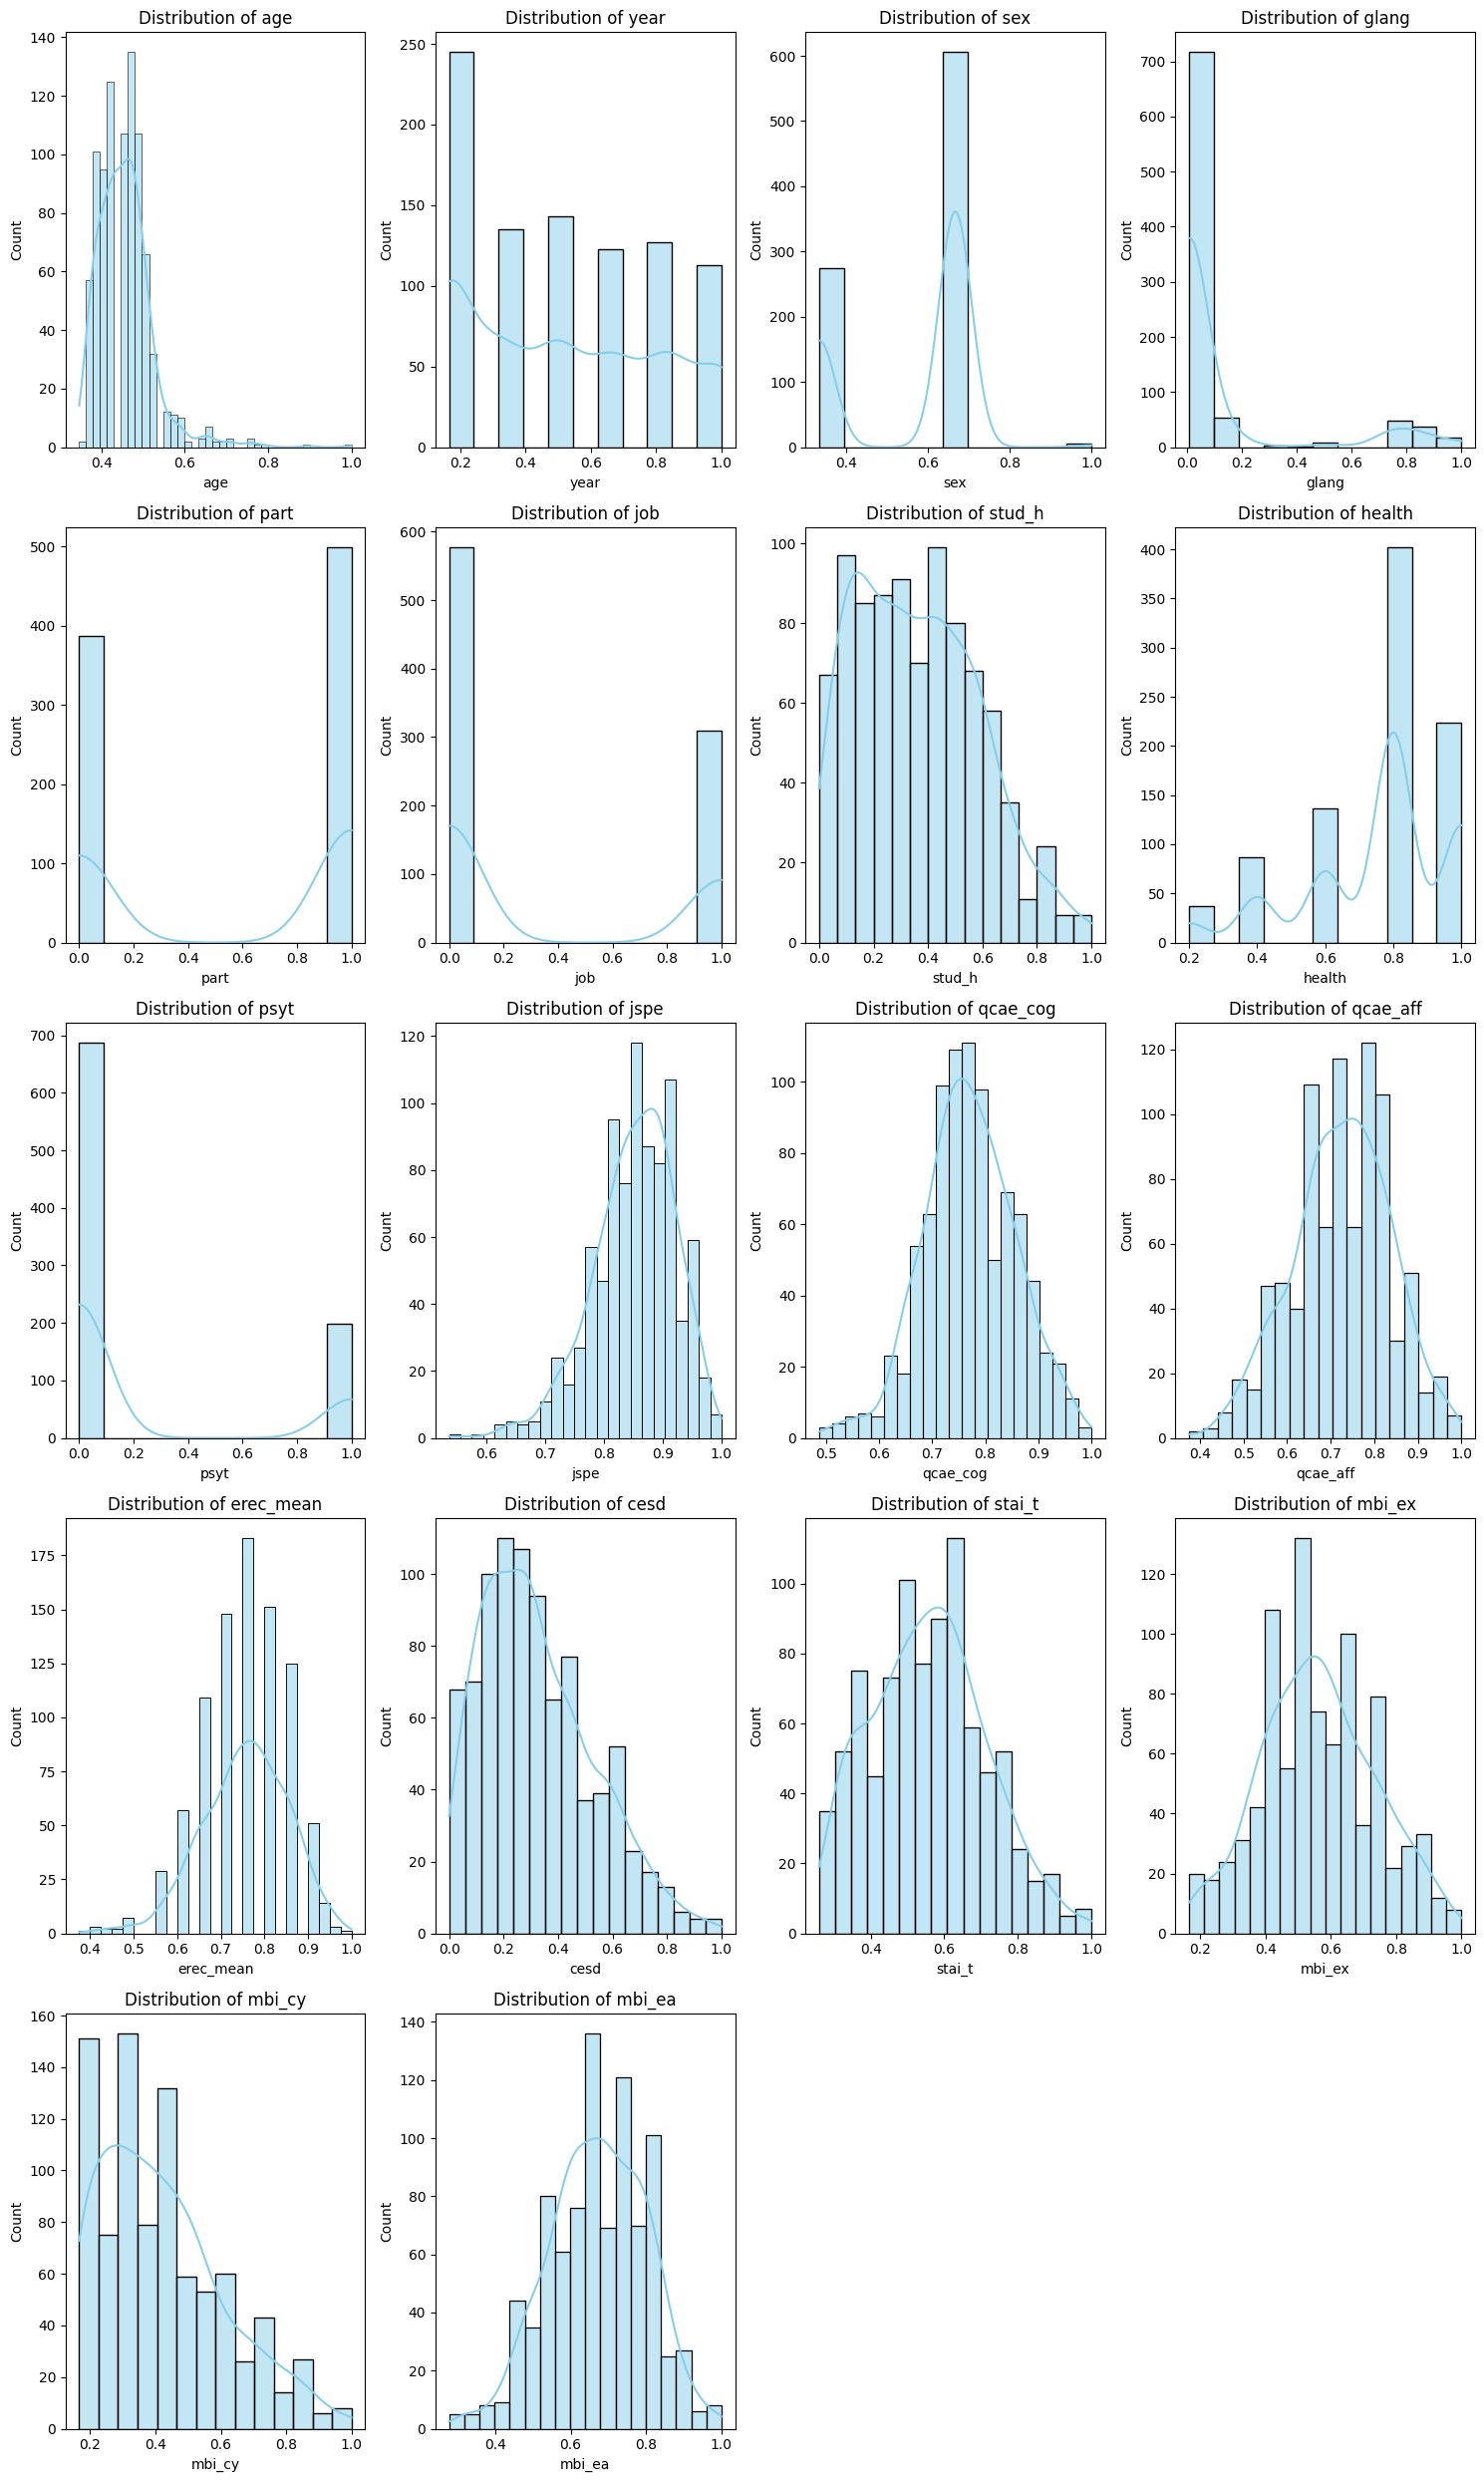

In [6]:
df_max_scaled = df.copy() 
  
# apply normalization techniques 
for column in df_max_scaled.columns: 
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max() 

df_dis(df_max_scaled)

## Normalització Min Max 

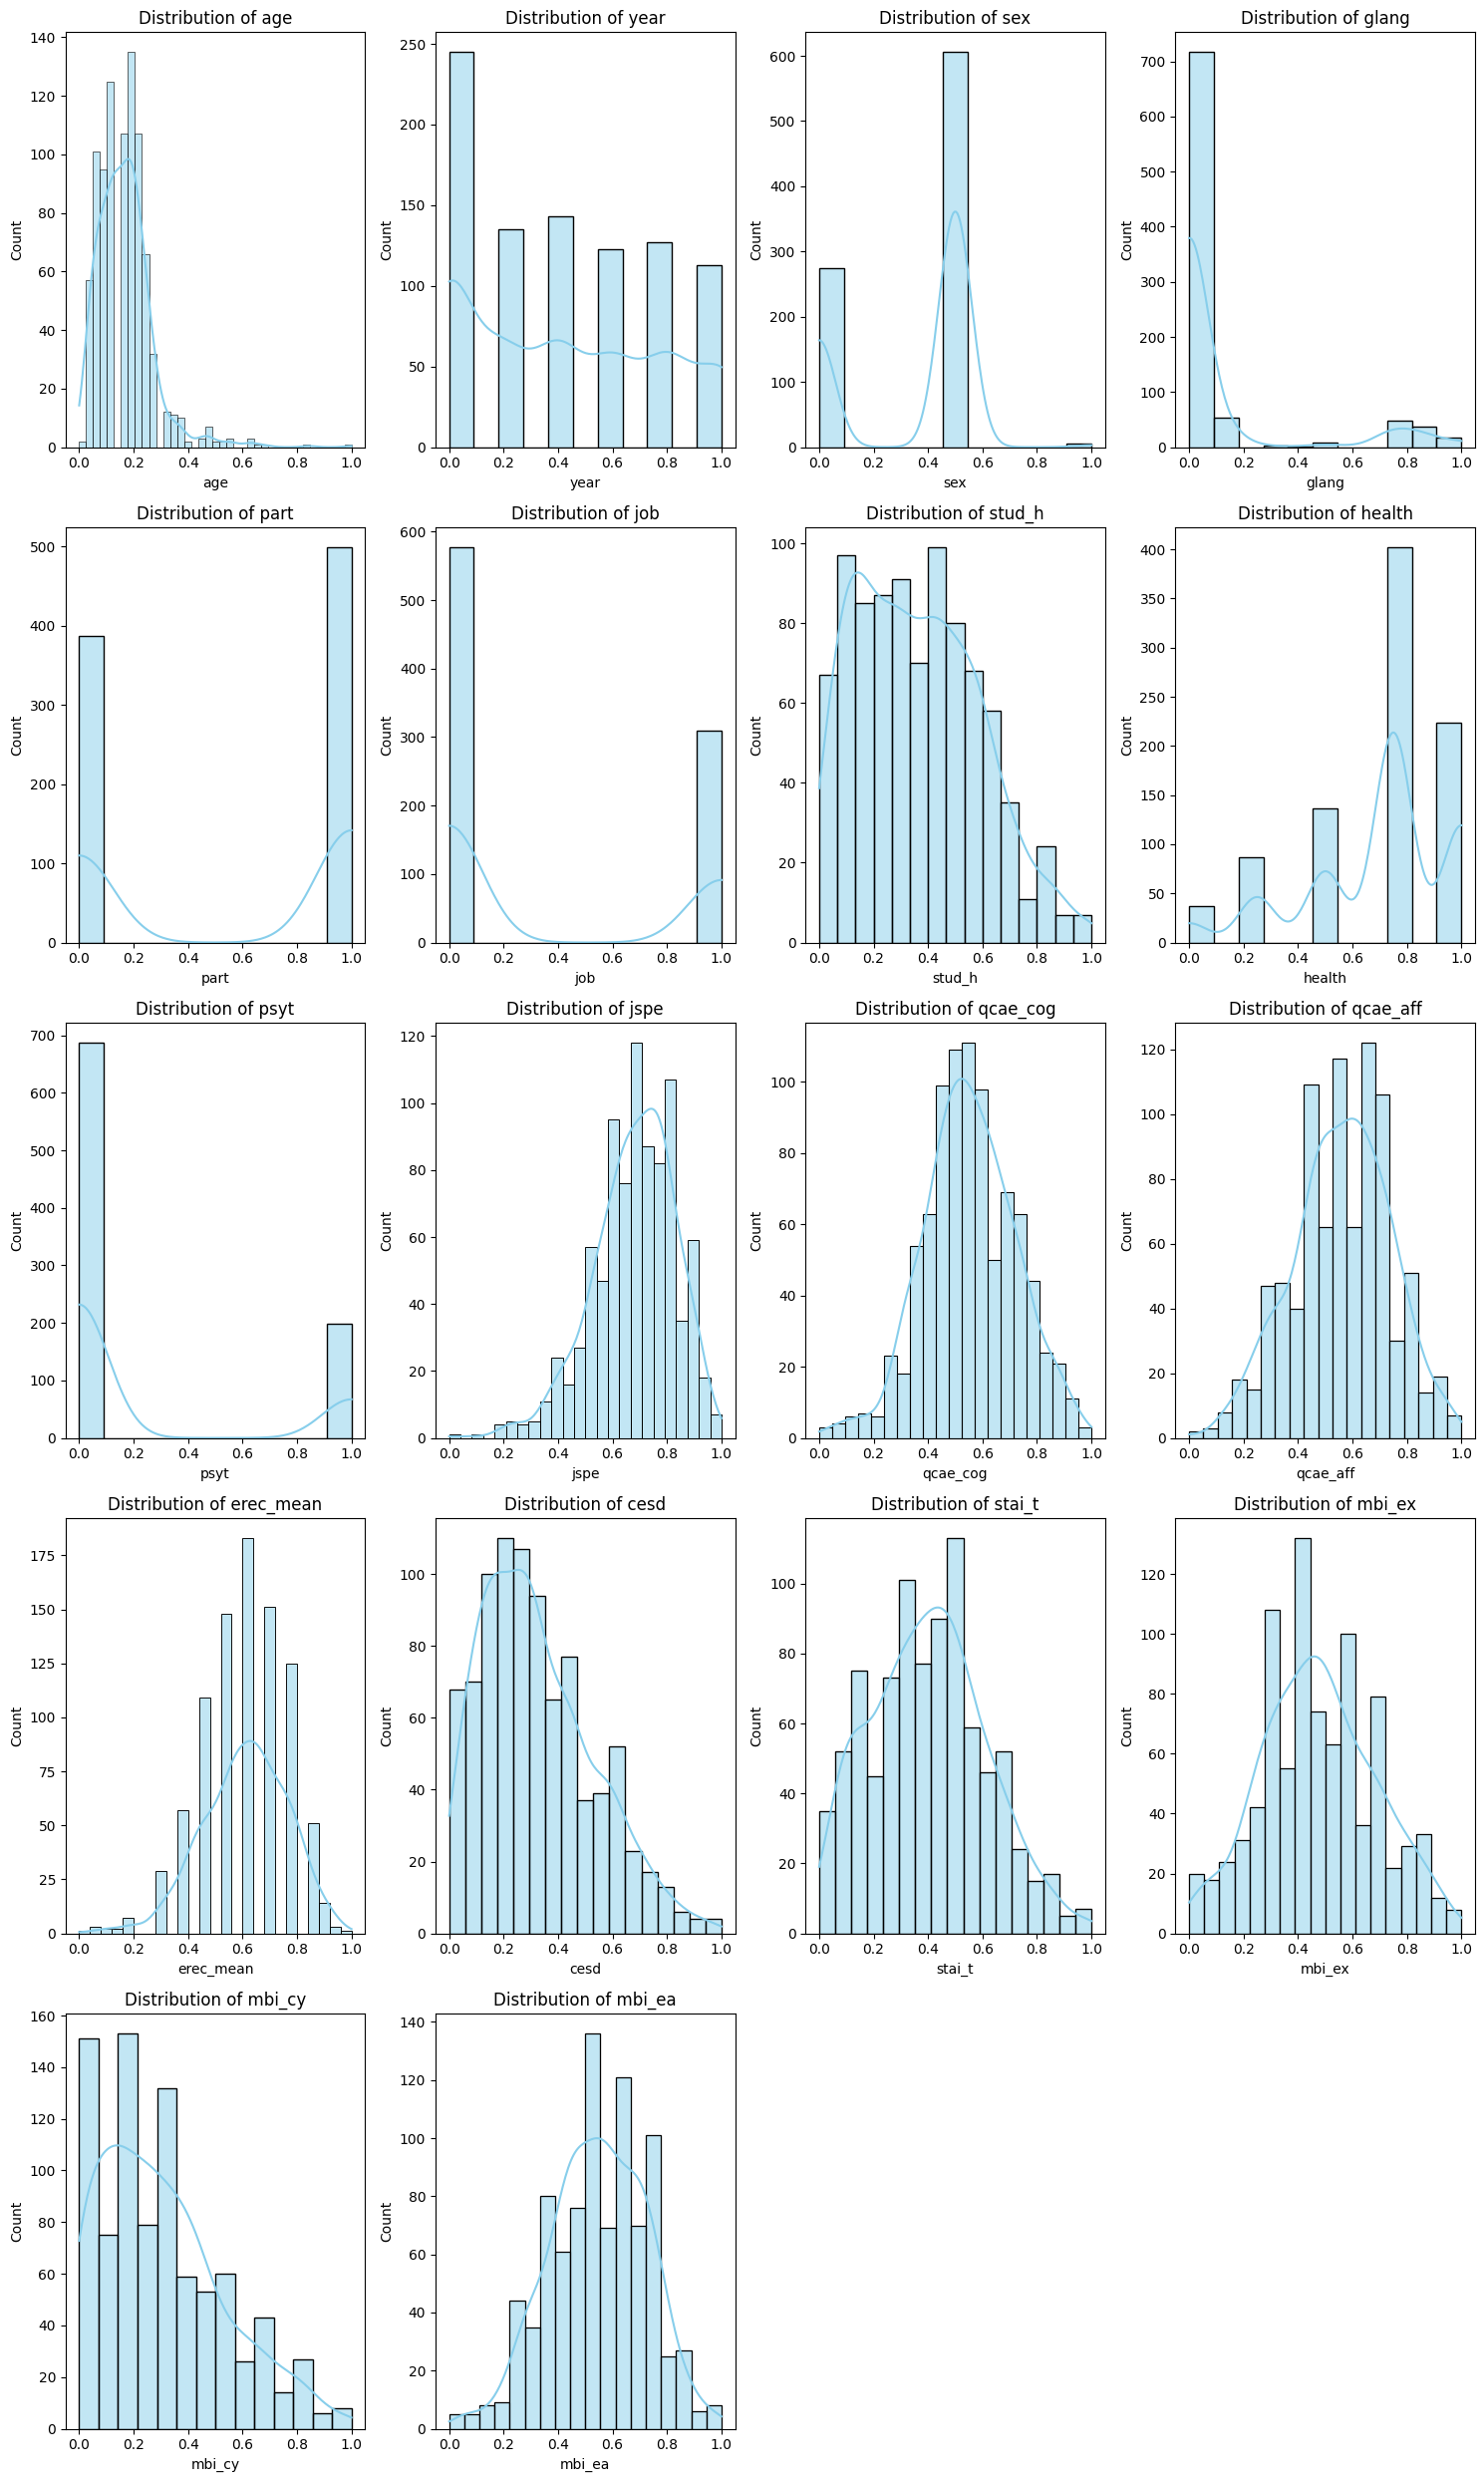

In [7]:
df_min_max_scaled = df.copy() 
  
# apply normalization techniques 
for column in df_min_max_scaled.columns: 
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())     
  
# view normalized data 
df_dis(df_min_max_scaled)

### Comprovacions

In [8]:
df_default = df.copy()
df_default.head()

,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
0,18,1,1,120,1,0,56,3,0,88,62,27,0.738095,34,61,17,13,20
1,26,4,1,1,1,0,20,4,0,109,55,37,0.690476,7,33,14,11,26
2,21,3,2,1,0,0,36,3,0,106,64,39,0.690476,25,73,24,7,23
3,21,2,2,1,0,1,51,5,0,101,52,33,0.833333,17,48,16,10,21
4,21,3,1,1,1,0,22,4,0,102,58,28,0.690476,14,46,22,14,23


In [9]:
df_max_scaled.head()

,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
0,0.367347,0.166667,0.333333,0.991736,1.0,0.0,0.800000,0.6,0.0,0.704,0.815789,0.562500,0.775,0.607143,0.792208,0.566667,0.541667,0.555556
1,0.530612,0.666667,0.333333,0.008264,1.0,0.0,0.285714,0.8,0.0,0.872,0.723684,0.770833,0.725,0.125000,0.428571,0.466667,0.458333,0.722222
2,0.428571,0.500000,0.666667,0.008264,0.0,0.0,0.514286,0.6,0.0,0.848,0.842105,0.812500,0.725,0.446429,0.948052,0.800000,0.291667,0.638889
3,0.428571,0.333333,0.666667,0.008264,0.0,1.0,0.728571,1.0,0.0,0.808,0.684211,0.687500,0.875,0.303571,0.623377,0.533333,0.416667,0.583333
4,0.428571,0.500000,0.333333,0.008264,1.0,0.0,0.314286,0.8,0.0,0.816,0.763158,0.583333,0.725,0.250000,0.597403,0.733333,0.583333,0.638889


In [10]:
df_min_max_scaled.head()

,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
0,0.03125,0.0,0.0,0.991667,1.0,0.0,0.800000,0.50,0.0,0.362069,0.641026,0.300000,0.64,0.607143,0.719298,0.48,0.45,0.384615
1,0.28125,0.6,0.0,0.000000,1.0,0.0,0.285714,0.75,0.0,0.724138,0.461538,0.633333,0.56,0.125000,0.228070,0.36,0.35,0.615385
2,0.12500,0.4,0.5,0.000000,0.0,0.0,0.514286,0.50,0.0,0.672414,0.692308,0.700000,0.56,0.446429,0.929825,0.76,0.15,0.500000
3,0.12500,0.2,0.5,0.000000,0.0,1.0,0.728571,1.00,0.0,0.586207,0.384615,0.500000,0.80,0.303571,0.491228,0.44,0.30,0.423077
4,0.12500,0.4,0.0,0.000000,1.0,0.0,0.314286,0.75,0.0,0.603448,0.538462,0.333333,0.56,0.250000,0.456140,0.68,0.50,0.500000
